In [35]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the end date as today and start date as 3 years ago
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)  # Approximate 3 years

# Define the top 50 stocks in Japan. Note: This list may need to be adjusted based on current market cap
top_50_stocks = [
    '7203.T', '6954.T', '7267.T', '8058.T', '6501.T', '8306.T', '8035.T', '6971.T', '9984.T', '8316.T',
    '8411.T', '9433.T', '8801.T', '8604.T', '8410.T', '9432.T', '6758.T', '6752.T', '6367.T', '6902.T',
    '8830.T', '8001.T', '6861.T', '6503.T', '8309.T', '8308.T', '8802.T', '7270.T', '8303.T', '6762.T',
    '7751.T', '6753.T', '9735.T', '6981.T', '4502.T', '6976.T', '8750.T', '8028.T', '5401.T', '6326.T',
    '8766.T', '8630.T', '9020.T', '8113.T', '4063.T', '8725.T', '4503.T', '6301.T', '6702.T', '8795.T'
]

# Define TOPIX
topix = '1306.T'

# Function to download and calculate daily returns
def fetch_and_calculate_returns(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    returns = data['Close'].pct_change().dropna()
    returns.name = ticker
    return returns

# Download data for stocks
stocks_data = []
for ticker in top_50_stocks:
    returns = fetch_and_calculate_returns(ticker, start_date, end_date)
    stocks_data.append(returns)

# Combine stock returns into a single DataFrame
stocks_df = pd.concat(stocks_data, axis=1)

# Download data for TOPIX
topix_returns = fetch_and_calculate_returns(topix, start_date, end_date)

# Combine stock returns and TOPIX returns into a single DataFrame
all_data = pd.concat([stocks_df, topix_returns], axis=1)
all_data = all_data[all_data.columns[(all_data.isnull().sum()/len(all_data)<0.1).values]]

# Save to CSV
all_data.to_csv('top_50_stocks_and_topix_daily_returns.csv')

display(all_data.head())
print(f"Data shape: {all_data.shape}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Ticker,7203.T,6954.T,7267.T,8058.T,6501.T,8306.T,8035.T,6971.T,9984.T,8316.T,...,8630.T,9020.T,8113.T,4063.T,8725.T,4503.T,6301.T,6702.T,8795.T,1306.T
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,-0.003219,0.004404,-0.005405,-0.003428,-0.003025,-0.005042,-0.006689,-0.000133,0.003646,-0.004433,...,-0.012589,-0.001927,0.007319,0.002092,-0.005787,-0.008786,-0.000755,0.004401,-0.016760,0.000000
2019-12-25,-0.008397,-0.000487,-0.005115,-0.001204,-0.000867,-0.003041,-0.003367,0.001199,-0.007479,-0.003464,...,-0.000927,-0.000508,-0.013724,0.000418,0.002217,0.002149,-0.001510,-0.000487,-0.004261,-0.003913
2019-12-26,0.006384,0.009018,0.009640,0.006372,-0.003037,0.006100,0.011613,0.005854,0.012056,0.003476,...,0.001856,0.003151,0.007094,0.016277,0.004148,0.002948,0.008130,0.004384,0.002853,0.005612
2019-12-27,0.001036,0.000242,-0.002228,-0.000171,0.003046,0.006568,-0.003340,-0.003571,0.014678,0.005690,...,0.005095,0.001520,-0.003251,0.003696,0.001377,0.001871,-0.001875,-0.006305,0.004979,0.004464
2019-12-30,-0.002457,-0.018112,-0.011483,-0.007359,0.003471,-0.007529,0.002094,-0.007036,-0.002935,-0.006642,...,-0.009217,-0.002631,0.005708,-0.013093,-0.006876,-0.002401,-0.007140,0.002440,-0.012739,-0.009444


Data shape: (1220, 49)


In [32]:
def generate_features(data, stock_columns, index_column, time_column, rolling_windows=[3, 5, 10]):
    """
    Generate a feature-rich DataFrame for index return prediction.

    Args:
        data (pd.DataFrame): Input DataFrame containing time-series returns.
                             Expected columns: stock_columns, index_column, time_column.
        stock_columns (list of str): List of stock ticker columns.
        index_column (str): Column name for the index return.
        time_column (str): Column name of the timestamp (datetime type).
        rolling_windows (list of int): Rolling windows for features like volatility, beta, etc.

    Returns:
        pd.DataFrame: DataFrame containing engineered features.
    """
    df = data.copy()
    df = df.sort_values(by=time_column).reset_index(drop=True)  # Ensure the data is time-ordered
    rolling_windows = sorted(rolling_windows)

    # -----------------------------
    # 1. Lagged Features
    # -----------------------------
    max_lag = max(rolling_windows)
    for lag in range(1, max_lag + 1):
        # Lagged returns for index
        df[f"{index_column}_lag_{lag}"] = df[index_column].shift(lag)
        # Lagged returns for each stock
        for stock in stock_columns:
            df[f"{stock}_lag_{lag}"] = df[stock].shift(lag)

    # -----------------------------
    # 2. Historical Volatility (Rolling Standard Deviation)
    # -----------------------------
    for window in rolling_windows:
        # Index volatility
        df[f"{index_column}_rolling_vol_{window}"] = (
            df[index_column].rolling(window).std()
        )
        # Cross-sectional stock volatility
        df[f"stocks_rolling_vol_{window}"] = (
            df[stock_columns].std(axis=1).rolling(window).mean()
        )

    # -----------------------------
    # 3. Dispersion
    # -----------------------------
    for window in rolling_windows:
        # Dispersion = rolling (max - min) of stock returns
        df[f"stocks_dispersion_{window}"] = (
            df[stock_columns].rolling(window).max().max(axis=1)
            - df[stock_columns].rolling(window).min().min(axis=1)
        )

    # -----------------------------
    # 4. Cross-Sectional Return Aggregates
    # -----------------------------
    for window in rolling_windows:
        # Mean, standard deviation, skewness (using rolling windows of stock returns)
        df[f"stocks_mean_{window}"] = df[stock_columns].rolling(window).mean().mean(axis=1)
        df[f"stocks_std_{window}"] = df[stock_columns].rolling(window).std().mean(axis=1)
        df[f"stocks_skew_{window}"] = df[stock_columns].rolling(window).skew().mean(axis=1)

    # -----------------------------
    # 5. Correlation with Index
    # -----------------------------
    for window in rolling_windows:
        for stock in stock_columns:
            df[f"{stock}_index_corr_{window}"] = (
                df[[index_column, stock]].rolling(window).corr().unstack().iloc[:, 1]
            )

    # -----------------------------
    # 6. Time-Based Features
    # -----------------------------
    df["hour"] = df[time_column].dt.hour
    df["minute"] = df[time_column].dt.minute
    df["day_of_week"] = df[time_column].dt.dayofweek  # Monday=0, Sunday=6
    df["is_opening_hour"] = (df["hour"] == 9).astype(int)  # Example: morning session in Japan
    
    # -----------------------------
    # 7. Market Breadth
    # -----------------------------
    df["positive_stocks_count"] = (df[stock_columns] > 0).sum(axis=1)
    df["negative_stocks_count"] = (df[stock_columns] < 0).sum(axis=1)
    df["positive_fraction"] = df["positive_stocks_count"] / len(stock_columns)

    # -----------------------------
    # 8. Rolling Absolute Returns
    # -----------------------------
    for window in rolling_windows:
        df[f"{index_column}_rolling_abs_ret_{window}"] = (
            df[index_column].abs().rolling(window).mean()
        )
        df[f"stocks_rolling_abs_ret_{window}"] = (
            df[stock_columns].abs().rolling(window).mean().mean(axis=1)
        )

    # -----------------------------
    # Drop NA Rows (Generated by Rolling/Lagging)
    # -----------------------------
    df = df.dropna().reset_index(drop=True)

    return df


In [48]:
# Example usage:

# Simulated dataset
data = all_data.copy() #pd.read_csv("top_50_stocks_and_topix_daily_returns.csv", parse_dates=["timestamp"])
all_data["timestamp"] = all_data.index
stock_columns = all_data.columns[:-2]  # Top 50 stocks
index_column = '1306.T'  # Index column (e.g., TOPIX)
time_column = "timestamp"  # Timestamp column (datetime)

# Generate features
features = generate_features(data, stock_columns, index_column, time_column)

# Save features if needed
# features.to_csv("Top50_And_Index_Features.csv", index=False)


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features and target
features2 = features.drop(columns=['1306.T',"timestamp"])  # Assuming '1306.T' is the TOPIX index column
target = features['1306.T'].shift(-1).abs().dropna()  # Next 30-minute absolute return of the index

# Align features and target
features2 = features2.iloc[:-1]
# target = target.iloc[1:]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

# -----------------------------
# 1. Load Feature Data
# -----------------------------
# Assuming the same dataset as DNN
# data = pd.read_csv("Top50_And_Index_Features.csv")  # Replace with your input dataset
# features = [col for col in data.columns if col not in ["timestamp", "index", "target"]]  # Select predictors
target = index_column

# Train/Test Split
X = features.iloc[:-1].drop(columns = "timestamp")
X = X[X.columns[:600]]
y = features[target].shift(-1).iloc[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# -----------------------------
# 2. Train LightGBM Model
# -----------------------------
# Prepare Dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# LightGBM Parameters
params = {
    "objective": "regression",
    "metric": "mae",  # Mean Absolute Error
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 31,
    "max_depth": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
}

# Train LightGBM Model
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000
)

# -----------------------------
# 3. Evaluate LightGBM Model
# -----------------------------
# Predict on Test Set
y_pred = lgb_model.predict(X_test)

# Calculate Test MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"LightGBM Test MAE: {test_mae:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152512
[LightGBM] [Info] Number of data points in the train set: 772, number of used features: 600
[LightGBM] [Info] Start training from score 0.000570
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [88]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assume 'features' DataFrame is already generated and contains the target 'TOPIX_return_next_30min'
# features = pd.read_csv("top50_topix_features.csv", parse_dates=True, index_col='DateTime')

# Prepare data
X = features.drop(columns=["timestamp"]).iloc[:-1]
y = features["1306.T"].shift(-1).iloc[:-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = X_train #scaler.fit_transform(X_train)
X_test_scaled = X_test #scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, seed=42)
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], verbose=False)

# Predict on Test Set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate Test MAE
xgb_test_mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost Test MAE: {xgb_test_mae:.4f}')

XGBoost Test MAE: 0.0085


Performance Metrics:
  - Mean Absolute Error (MAE): 0.0085
  - Mean Squared Error (MSE): 0.0001
  - R^2 Score: -0.0962


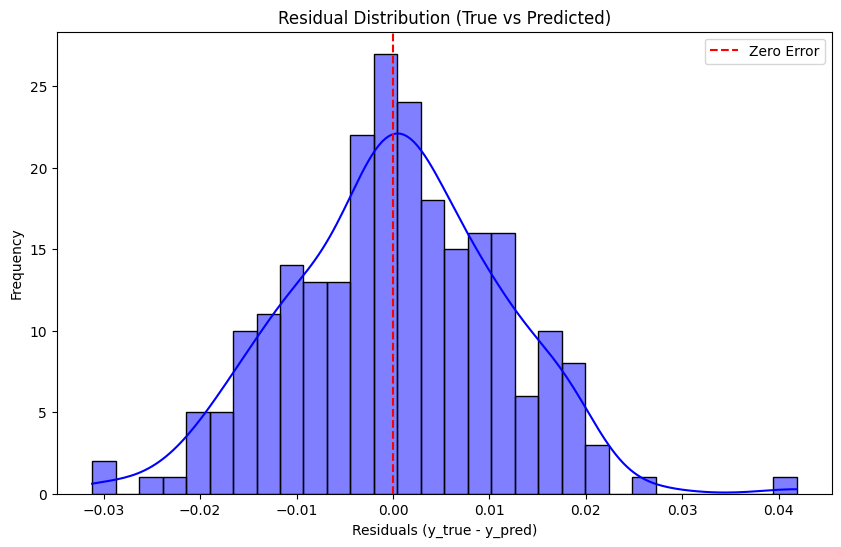

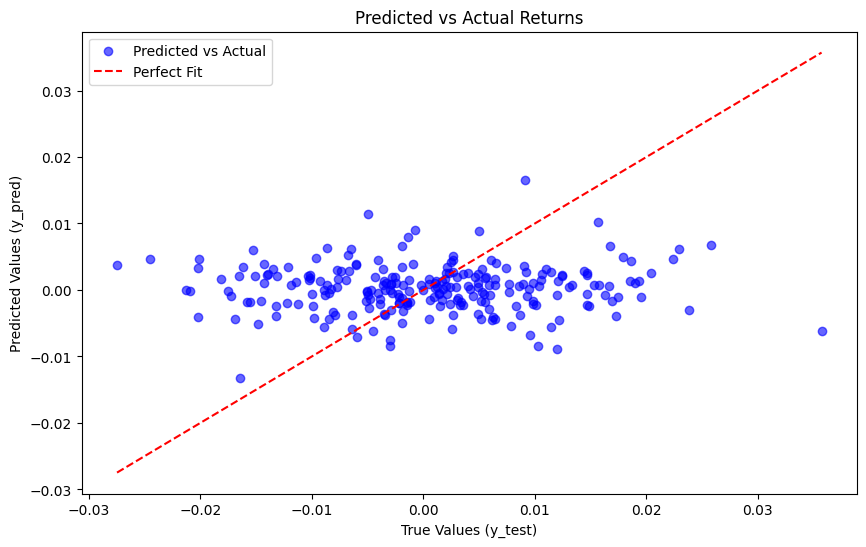

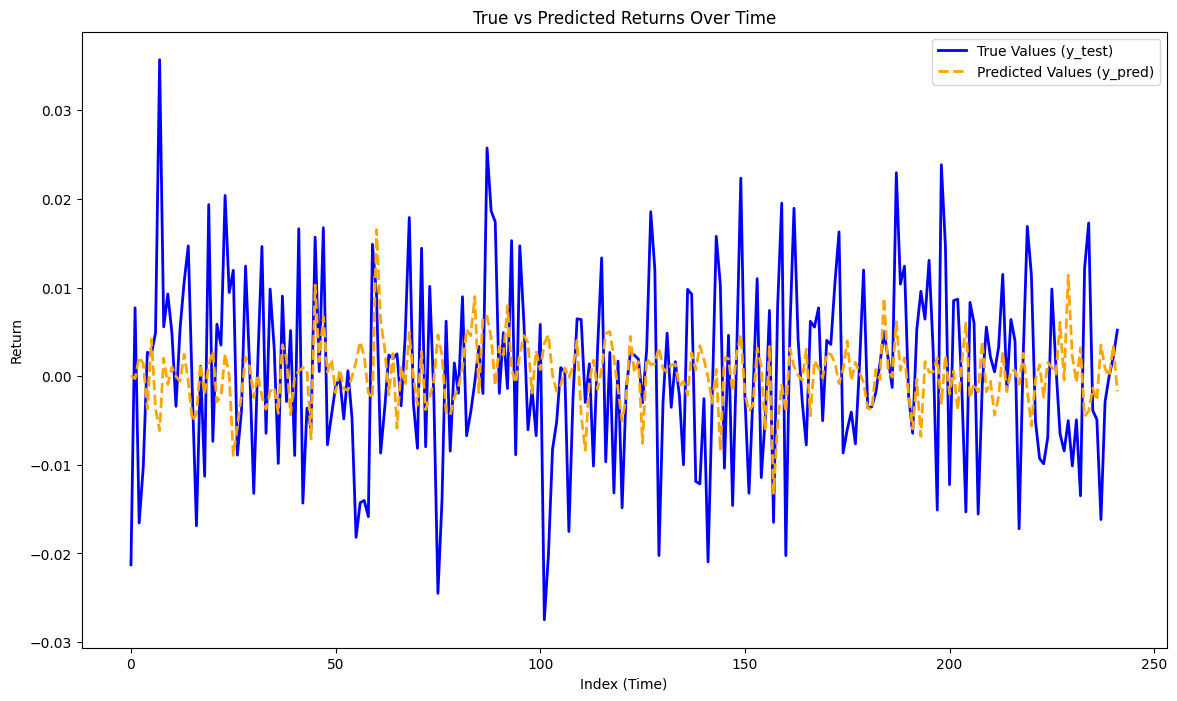

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 1. Additional Metrics
# -----------------------------
# Calculate additional regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Performance Metrics:")
print(f"  - Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - R^2 Score: {r2:.4f}")

# -----------------------------
# 2. Residuals Plot (Errors)
# -----------------------------
# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residual Distribution (True vs Predicted)")
plt.xlabel("Residuals (y_true - y_pred)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label="Zero Error")
plt.legend()
plt.show()

# -----------------------------
# 3. Prediction vs Actual Scatter Plot
# -----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="red", label="Perfect Fit")
plt.title("Predicted vs Actual Returns")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.legend()
plt.show()

# -----------------------------
# 4. Predicted vs Actual Over Time
# -----------------------------
# If the dataset includes a time column, you can visualize predictions over time.
# Assuming `X_test` includes a time column, merge with predictions for plotting.

# Add predictions to a DataFrame for time series visualization
results = X_test.copy()
results['y_test'] = y_test
results['y_pred'] = y_pred
results = results.reset_index()

# Plot true vs predicted values over time
plt.figure(figsize=(14, 8))
plt.plot(results.index, results['y_test'], label="True Values (y_test)", color="blue", linewidth=2)
plt.plot(results.index, results['y_pred'], label="Predicted Values (y_pred)", color="orange", linestyle="--", linewidth=2)
plt.title("True vs Predicted Returns Over Time")
plt.xlabel("Index (Time)")
plt.ylabel("Return")
plt.legend()
plt.show()

# -----------------------------
# 5. Feature Importance Plot
# -----------------------------
# Visualize LightGBM feature importances
# feature_importance = lgb_model.feature_importance(importance_type='gain')
# feature_names = X_train.columns

# # Create a DataFrame for plotting importance
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# importance_df = importance_df.sort_values(by="Importance", ascending=False).head(20)

# # Plot feature importance
# plt.figure(figsize=(10, 8))
# sns.barplot(data=importance_df, y='Feature', x='Importance', palette="viridis")
# plt.title("Top 20 Feature Importances (LightGBM)")
# plt.xlabel("Importance (Gain)")
# plt.ylabel("Feature")
# plt.show()


Performance Metrics:
  - Mean Absolute Error (MAE): 0.0085
  - Mean Squared Error (MSE): 0.0001
  - R^2 Score: -0.0962


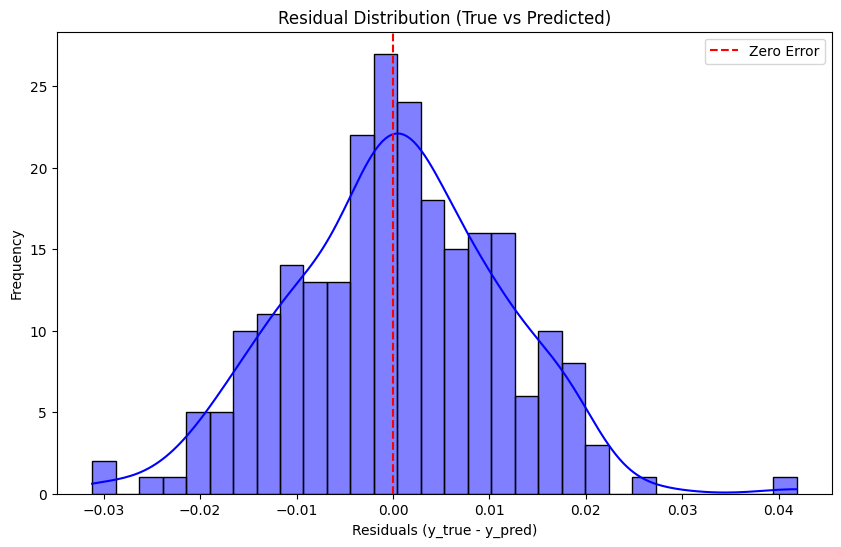

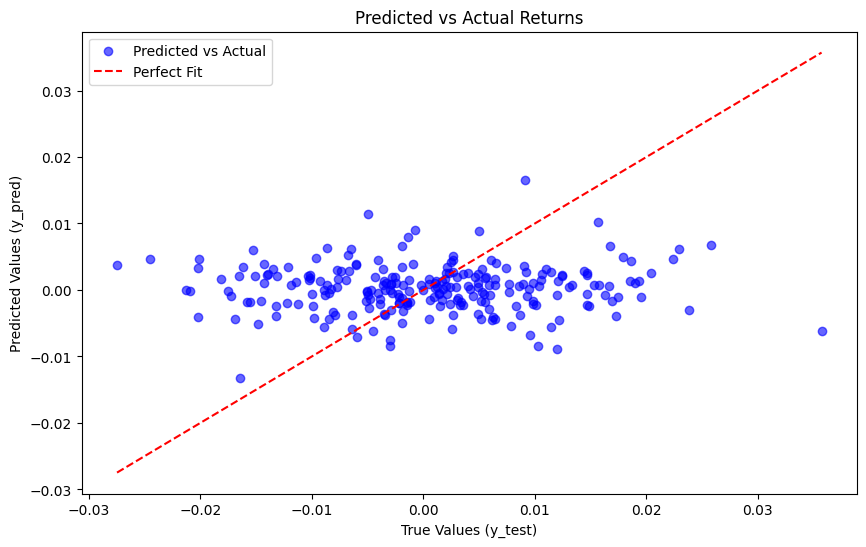

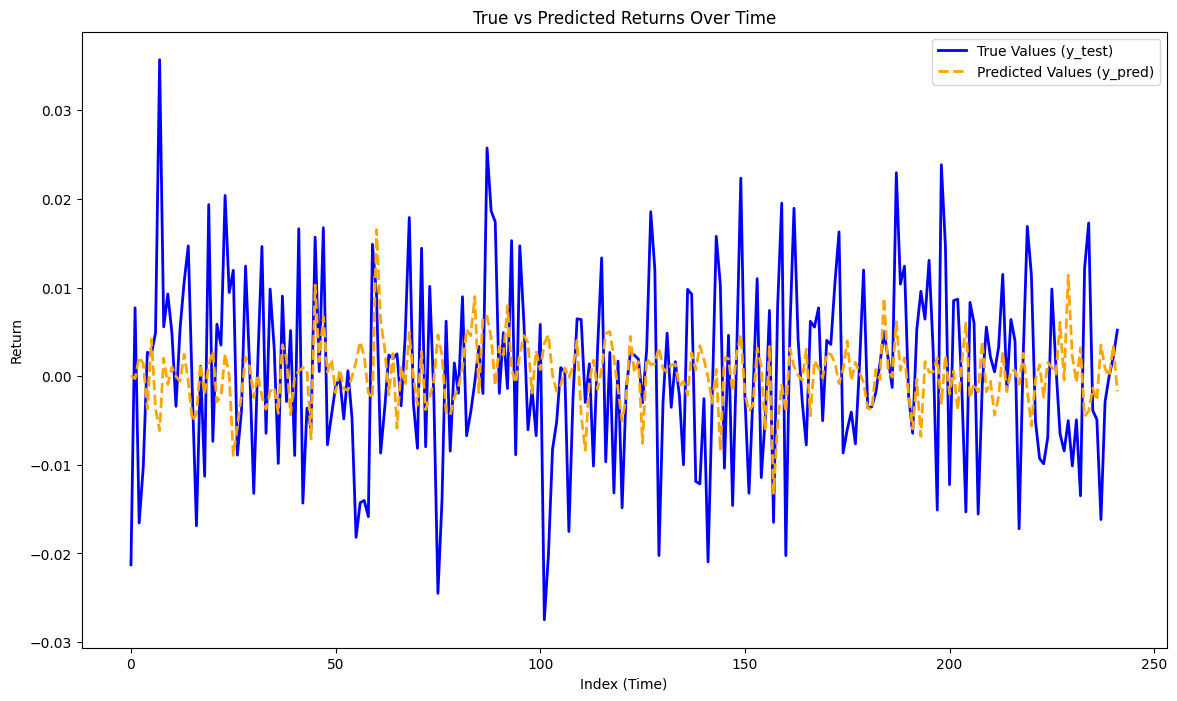

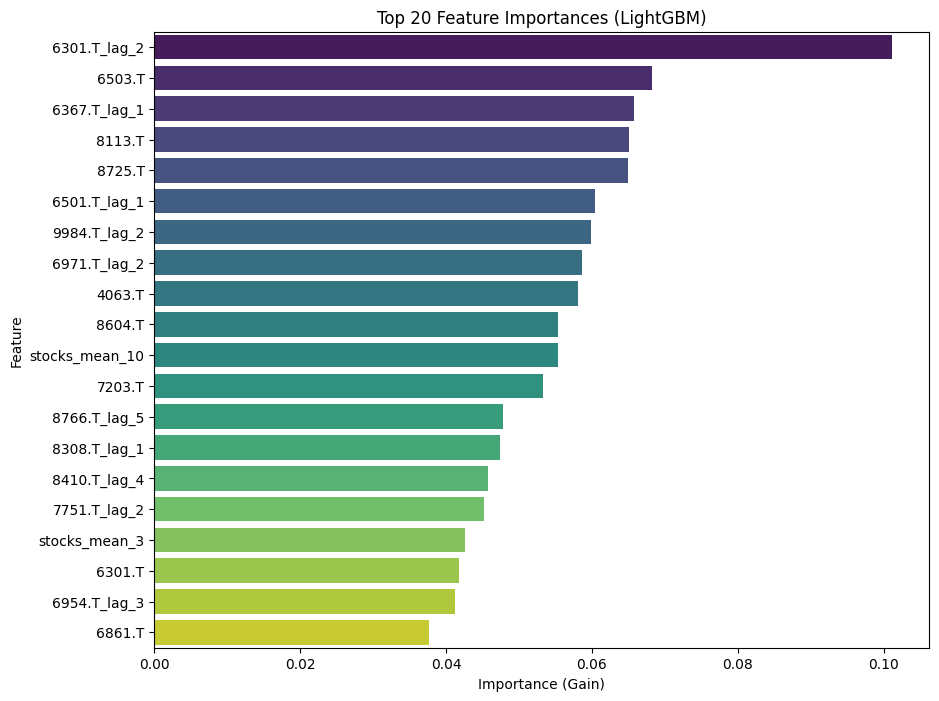

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 1. Additional Metrics
# -----------------------------
# Calculate additional regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Performance Metrics:")
print(f"  - Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - R^2 Score: {r2:.4f}")

# -----------------------------
# 2. Residuals Plot (Errors)
# -----------------------------
# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residual Distribution (True vs Predicted)")
plt.xlabel("Residuals (y_true - y_pred)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label="Zero Error")
plt.legend()
plt.show()

# -----------------------------
# 3. Prediction vs Actual Scatter Plot
# -----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="red", label="Perfect Fit")
plt.title("Predicted vs Actual Returns")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.legend()
plt.show()

# -----------------------------
# 4. Predicted vs Actual Over Time
# -----------------------------
# If the dataset includes a time column, you can visualize predictions over time.
# Assuming `X_test` includes a time column, merge with predictions for plotting.

# Add predictions to a DataFrame for time series visualization
results = X_test.copy()
results['y_test'] = y_test
results['y_pred'] = y_pred
results = results.reset_index()

# Plot true vs predicted values over time
plt.figure(figsize=(14, 8))
plt.plot(results.index, results['y_test'], label="True Values (y_test)", color="blue", linewidth=2)
plt.plot(results.index, results['y_pred'], label="Predicted Values (y_pred)", color="orange", linestyle="--", linewidth=2)
plt.title("True vs Predicted Returns Over Time")
plt.xlabel("Index (Time)")
plt.ylabel("Return")
plt.legend()
plt.show()

# -----------------------------
# 5. Feature Importance Plot
# -----------------------------
# Visualize LightGBM feature importances
feature_importance = lgb_model.feature_importance(importance_type='gain')
feature_names = X_train.columns

# Create a DataFrame for plotting importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(20)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette="viridis")
plt.title("Top 20 Feature Importances (LightGBM)")
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.show()


LightGBM Test MAE: 0.0085
LightGBM Test MSE: 0.0001
LightGBM Test RMSE: 0.0109
LightGBM Test R²: -0.0962


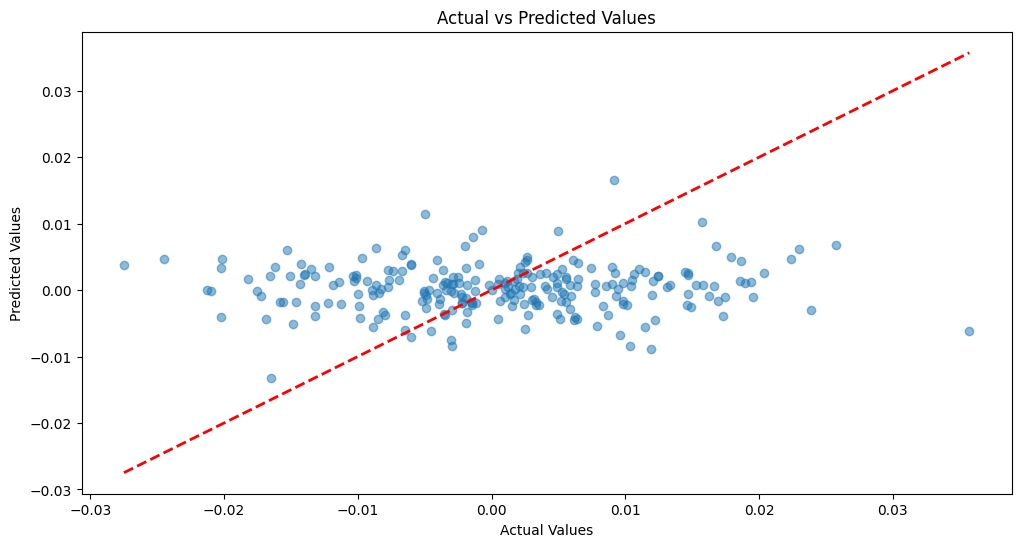

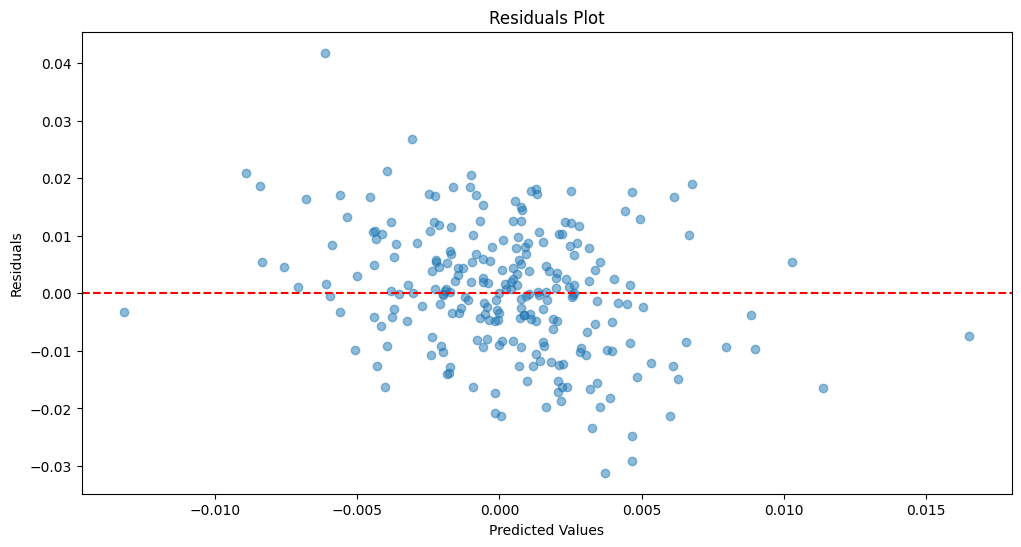

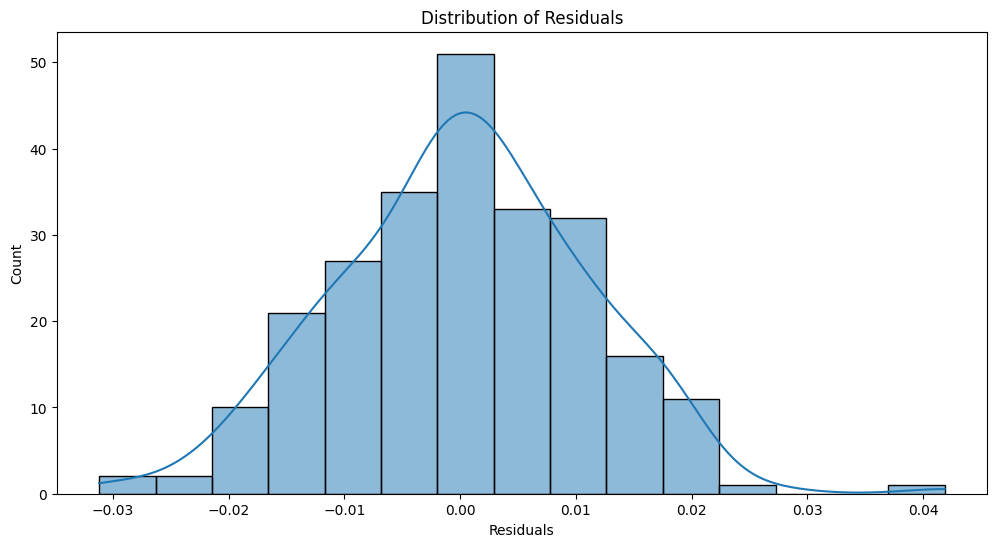

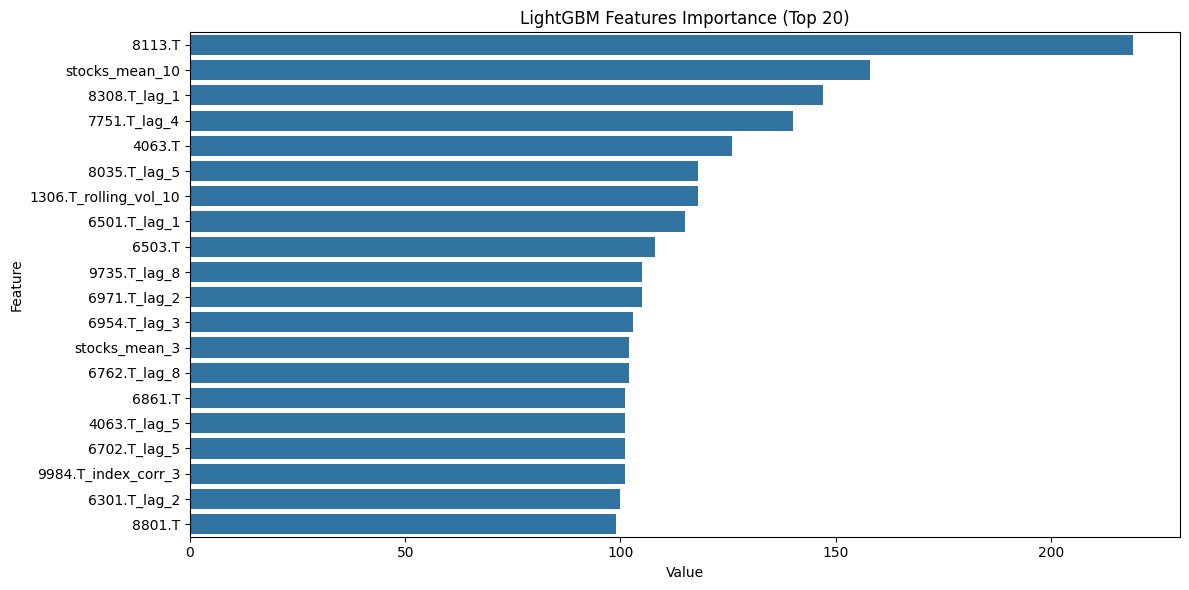

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152995
[LightGBM] [Info] Number of data points in the train set: 966, number of used features: 600
[LightGBM] [Info] Start training from score 0.000454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [83]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is already loaded
# data = pd.read_csv("Top50_And_Index_Features.csv")
# features = [col for col in data.columns if col not in ["timestamp", "index", "target"]]
# target = index_column

# Train/Test Split
# X = features.iloc[:-1].drop(columns="timestamp")
# X = X[X.columns[:600]]
# y = features[target].shift(-1).iloc[:-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Prepare Dataset for LightGBM
# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_val, label=y_val)

# # LightGBM Parameters
# params = {
#     "objective": "regression",
#     "metric": "mae",
#     "boosting_type": "gbdt",
#     "learning_rate": 0.01,
#     "num_leaves": 31,
#     "max_depth": -1,
#     "feature_fraction": 0.8,
#     "bagging_fraction": 0.8,
#     "bagging_freq": 5,
#     "seed": 42,
# }

# # Train LightGBM Model
# lgb_model = lgb.train(
#     params,
#     train_data,
#     valid_sets=[train_data, val_data],
#     num_boost_round=1000,
#     early_stopping_rounds=50,
#     verbose_eval=100,
# )

# # Predict on Test Set
# y_pred = lgb_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"LightGBM Test MAE: {mae:.4f}")
print(f"LightGBM Test MSE: {mse:.4f}")
print(f"LightGBM Test RMSE: {rmse:.4f}")
print(f"LightGBM Test R²: {r2:.4f}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Visualization: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Visualization: Distribution of Residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Feature Importance
feature_imp = pd.DataFrame(sorted(zip(lgb_model.feature_importance(), X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features Importance (Top 20)')
plt.tight_layout()
plt.show()

# Optional: Cross-validation (takes more time but gives robustness check)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mae = []
cv_scores_mse = []
cv_scores_rmse = []
cv_scores_r2 = []

for train_index, test_index in cv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    train_data_cv = lgb.Dataset(X_train_cv, label=y_train_cv)
    val_data_cv = lgb.Dataset(X_test_cv, label=y_test_cv)
    
    cv_model = lgb.train(
        params,
        train_data_cv,
        valid_sets=[train_data_cv, val_data_cv],
        num_boost_round=1000,
        # early_stopping_rounds=50,
        # verbose_eval=False,
    )
    
    y_pred_cv = cv_model.predict(X_test_cv)
    
    cv_scores_mae.append(mean_absolute_error(y_test_cv, y_pred_cv))
    cv_scores_mse.append(mean_squared_error(y_test_cv, y_pred_cv))
    cv_scores_rmse.append(np.sqrt(mean_squared_error(y_test_cv, y_pred_cv)))
    cv_scores_r2.append(r2_score(y_test_cv, y_pred_cv))

print("Cross-Validation Scores:")
print(f"MAE: {np.mean(cv_scores_mae):.4f} (+/- {np.std(cv_scores_mae):.4f})")
print(f"MSE: {np.mean(cv_scores_mse):.4f} (+/- {np.std(cv_scores_mse):.4f})")
print(f"RMSE: {np.mean(cv_scores_rmse):.4f} (+/- {np.std(cv_scores_rmse):.4f})")
print(f"R²: {np.mean(cv_scores_r2):.4f} (+/- {np.std(cv_scores_r2):.4f})")

In [51]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# -----------------------------
# 1. PyTorch Dataset Definition
# -----------------------------
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# -----------------------------
# 2. Neural Network Definition
# -----------------------------
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, dropout=0.1):
        super(DNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)  # Final layer for regression
        )

    def forward(self, x):
        return self.network(x)

# -----------------------------
# 3. Training Function
# -----------------------------
def train_model(model, optimizer, criterion, train_loader, val_loader, epochs=100):
    for epoch in range(1, epochs + 1):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch).squeeze()  # Remove extra dimensions
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation Loss
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch).squeeze()
                val_loss += criterion(y_pred, y_batch).item()

        print(f"Epoch {epoch}/{epochs} - Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")
    return model

# -----------------------------
# 4. Prepare Data
# -----------------------------
# Load your data with features generated and target
data = pd.read_csv("Top50_And_Index_Features.csv")  # Replace with your feature dataset
features = [col for col in data.columns if col not in ["timestamp", "index", "target"]]  # Select predictors
target = "target"

# Train/Test Split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Prepare PyTorch Datasets
train_dataset = TimeSeriesDataset(pd.DataFrame(X_train_scaled), y_train)
val_dataset = TimeSeriesDataset(pd.DataFrame(X_val_scaled), y_val)
test_dataset = TimeSeriesDataset(pd.DataFrame(X_test_scaled), y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 5. Train DNN Model
# -----------------------------
input_dim = X_train.shape[1]
model = DNN(input_dim)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
model = train_model(model, optimizer, criterion, train_loader, val_loader, epochs=50)

# -----------------------------
# 6. Evaluate Model
# -----------------------------
model.eval()
with torch.no_grad():
    test_predictions = []
    test_ground_truth = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch).squeeze()
        test_predictions.append(y_pred.numpy())
        test_ground_truth.append(y_batch.numpy())

# Convert results to arrays
test_predictions = np.concatenate(test_predictions)
test_ground_truth = np.concatenate(test_ground_truth)

# Calculate Test MAE
test_mae = np.mean(np.abs(test_predictions - test_ground_truth))
print(f"DNN Test MAE: {test_mae:.4f}")

FileNotFoundError: [Errno 2] No such file or directory: 'Top50_And_Index_Features.csv'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
dnn_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'DNN Test Loss: {dnn_loss}')

# Make predictions
dnn_predictions = model.predict(X_test_scaled).flatten()


In [ ]:
import lightgbm as lgb

# Prepare the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
lgb_model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=50, verbose_eval=100)

# Make predictions
lgb_predictions = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
lgb_loss = lgb_model.best_score['valid_0']['l2']
print(f'LightGBM Test Loss: {lgb_loss}')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Evaluate DNN
dnn_mae = mean_absolute_error(y_test, dnn_predictions)
dnn_mse = mean_squared_error(y_test, dnn_predictions)
print(f'DNN MAE: {dnn_mae}, MSE: {dnn_mse}')

# Evaluate LightGBM
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
print(f'LightGBM MAE: {lgb_mae}, MSE: {lgb_mse}')

# Plot actual vs predicted for DNN
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(dnn_predictions, label='DNN Predicted')
plt.legend()
plt.title('DNN: Actual vs Predicted 30-minute Index Absolute Returns')
plt.xlabel('Time')
plt.ylabel('Absolute Return')
plt.show()

# Plot actual vs predicted for LightGBM
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lgb_predictions, label='LightGBM Predicted')
plt.legend()
plt.title('LightGBM: Actual vs Predicted 30-minute Index Absolute Returns')
plt.xlabel('Time')
plt.ylabel('Absolute Return')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assume 'features' DataFrame is already generated and contains the target 'TOPIX_return_next_30min'
# features = pd.read_csv("top50_topix_features.csv", parse_dates=True, index_col='DateTime')

# Prepare data
X = features.drop(columns=['TOPIX_return_next_30min'])
y = features['TOPIX_return_next_30min']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build DNN model
def build_dnn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_dim = X_train.shape[1]
dnn_model = build_dnn_model(input_dim)

# Train DNN model
dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate DNN model
dnn_loss = dnn_model.evaluate(X_test_scaled, y_test)
print(f'DNN Test Loss: {dnn_loss}')

# Make predictions
dnn_predictions = dnn_model.predict(X_test_scaled)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Prepare data for LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# Define parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train LightGBM model
lgb_model = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_eval, early_stopping_rounds=50)

# Evaluate LightGBM model
lgb_predictions = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
lgb_loss = mean_squared_error(y_test, lgb_predictions)
print(f'LightGBM Test Loss: {lgb_loss}')

# Make predictions
lgb_predictions = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_length=8):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        self.seq_length = seq_length
        
    def __len__(self):
        return len(self.X) - self.seq_length + 1
    
    def __getitem__(self, idx):
        return (
            self.X[idx:idx + self.seq_length],
            self.y[idx + self.seq_length - 1]
        )

class DNNPredictor(nn.Module):
    def __init__(self, input_dim, seq_length=8, hidden_dim=64):
        super().__init__()
        self.seq_length = seq_length
        
        # CNN for local pattern extraction
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, padding=1)
        
        # Attention mechanism
        self.attention = nn.MultiheadAttention(hidden_dim, num_heads=4)
        
        # LSTM for temporal dependencies
        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=2,
            dropout=0.2,
            batch_first=True
        )
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 32)
        self.fc3 = nn.Linear(32, 1)
        
        self.dropout = nn.Dropout(0.2)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        
    def forward(self, x):
        # Input shape: (batch_size, seq_length, features)
        
        # CNN blocks
        x = x.permute(0, 2, 1)  # (batch, features, seq)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.permute(0, 2, 1)  # (batch, seq, features)
        
        # Self-attention
        x_attn, _ = self.attention(x, x, x)
        x = x + x_attn  # Residual connection
        
        # LSTM
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take last sequence output
        
        # Fully connected layers
        x = self.batch_norm(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

class ReturnPredictor:
    def __init__(self, seq_length=8, model_type='dnn'):
        self.seq_length = seq_length
        self.model_type = model_type
        self.scaler = StandardScaler()
        self.model = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    def prepare_data(self, X, y):
        """Prepare data for training"""
        X_scaled = self.scaler.fit_transform(X)
        
        if self.model_type == 'dnn':
            dataset = TimeSeriesDataset(X_scaled, y, self.seq_length)
            return DataLoader(dataset, batch_size=32, shuffle=False)
        else:
            return X_scaled, y
    
    def create_model(self, input_dim):
        """Create either DNN or LightGBM model"""
        if self.model_type == 'dnn':
            self.model = DNNPredictor(input_dim, self.seq_length).to(self.device)
        else:
            self.model = lgb.LGBMRegressor(
                objective='regression',
                n_estimators=1000,
                learning_rate=0.01,
                num_leaves=31,
                feature_fraction=0.8,
                subsample=0.8,
                reg_alpha=0.1,
                reg_lambda=0.1,
                random_state=42
            )
    
    def train(self, X, y, valid_X=None, valid_y=None):
        """Train the model"""
        if self.model is None:
            self.create_model(X.shape[1])
        
        if self.model_type == 'dnn':
            return self._train_dnn(X, y, valid_X, valid_y)
        else:
            return self._train_lgb(X, y, valid_X, valid_y)
    
    def _train_dnn(self, X, y, valid_X=None, valid_y=None):
        train_loader = self.prepare_data(X, y)
        if valid_X is not None:
            valid_loader = self.prepare_data(valid_X, valid_y)
        
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        criterion = nn.MSELoss()
        
        train_losses = []
        valid_losses = []
        best_valid_loss = float('inf')
        patience = 10
        patience_counter = 0
        
        for epoch in range(100):
            # Training
            self.model.train()
            train_loss = 0
            for batch_X, batch_y in train_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                
                optimizer.zero_grad()
                y_pred = self.model(batch_X)
                loss = criterion(y_pred.squeeze(), batch_y)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
            
            train_loss /= len(train_loader)
            train_losses.append(train_loss)
            
            # Validation
            if valid_X is not None:
                valid_loss = self._evaluate_dnn(valid_loader, criterion)
                valid_losses.append(valid_loss)
                
                if valid_loss < best_valid_loss:
                    best_valid_loss = valid_loss
                    patience_counter = 0
                else:
                    patience_counter += 1
                
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    break
                
                print(f"Epoch {epoch}: Train Loss = {train_loss:.6f}, Valid Loss = {valid_loss:.6f}")
            else:
                print(f"Epoch {epoch}: Train Loss = {train_loss:.6f}")
        
        return train_losses, valid_losses
    
    def _train_lgb(self, X, y, valid_X=None, valid_y=None):
        X_scaled, y = self.prepare_data(X, y)
        
        if valid_X is not None:
            valid_X_scaled = self.scaler.transform(valid_X)
            eval_set = [(valid_X_scaled, valid_y)]
            self.model.fit(
                X_scaled, y,
                eval_set=eval_set,
                eval_metric='mse',
                early_stopping_rounds=50,
                verbose=100
            )
        else:
            self.model.fit(X_scaled, y)
        
        return self.model.evals_result_ if valid_X is not None else None
    
    def _evaluate_dnn(self, data_loader, criterion):
        self.model.eval()
        total_loss = 0
        
        with torch.no_grad():
            for batch_X, batch_y in data_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                y_pred = self.model(batch_X)
                loss = criterion(y_pred.squeeze(), batch_y)
                total_loss += loss.item()
        
        return total_loss / len(data_loader)
    
    def predict(self, X):
        """Make predictions"""
        X_scaled = self.scaler.transform(X)
        
        if self.model_type == 'dnn':
            self.model.eval()
            dataset = TimeSeriesDataset(X_scaled, np.zeros(len(X_scaled)), self.seq_length)
            loader = DataLoader(dataset, batch_size=32, shuffle=False)
            
            predictions = []
            with torch.no_grad():
                for batch_X, _ in loader:
                    batch_X = batch_X.to(self.device)
                    y_pred = self.model(batch_X)
                    predictions.extend(y_pred.cpu().numpy())
            
            return np.array(predictions)
        else:
            return self.model.predict(X_scaled)

# Usage example:
"""
# Prepare your data
X, y = prepare_features_and_target(data)  # Your feature preparation function

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train DNN model
dnn_predictor = ReturnPredictor(seq_length=8, model_type='dnn')
dnn_losses = dnn_predictor.train(X_train, y_train, X_test, y_test)
dnn_preds = dnn_predictor.predict(X_test)

# Train LightGBM model
lgb_predictor = ReturnPredictor(model_type='lgb')
lgb_results = lgb_predictor.train(X_train, y_train, X_test, y_test)
lgb_preds = lgb_predictor.predict(X_test)

# Evaluate results
def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"MSE: {mse:.6f}")
    print(f"R2: {r2:.6f}")
    return mse, r2

dnn_metrics = evaluate_predictions(y_test, dnn_preds, "DNN")
lgb_metrics = evaluate_predictions(y_test, lgb_preds, "LightGBM")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(dnn_preds, label='DNN Predictions')
plt.plot(lgb_preds, label='LightGBM Predictions')
plt.legend()
plt.title('Actual vs Predicted Returns')
plt.show()
"""


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import talib

class FeatureGenerator:
    def __init__(self, 
                 returns_df,  # DataFrame with datetime index, columns: ['index_return', 'stock1_return', ...]
                 lookback_periods=[1, 2, 4, 8],  # Number of 30-min bars to look back
                 volatility_windows=[4, 8, 16]):  # Windows for volatility calculation (in number of 30-min bars)
        self.returns_df = returns_df
        self.lookback_periods = lookback_periods
        self.volatility_windows = volatility_windows
        self.stock_cols = [col for col in returns_df.columns if col != 'index_return']
        
    def generate_all_features(self):
        """Generate all features and combine them"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        # Generate different types of features
        features_list = [
            self.generate_lagged_features(),
            self.generate_volatility_features(),
            self.generate_dispersion_features(),
            self.generate_cross_sectional_features(),
            self.generate_time_features(),
            self.generate_technical_features(),
            self.generate_correlation_features(),
            self.generate_momentum_features()
        ]
        
        # Combine all features
        features = pd.concat(features_list, axis=1)
        return features
    
    def generate_lagged_features(self):
        """Generate lagged return features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        # For both index and individual stocks
        for col in self.returns_df.columns:
            for lag in self.lookback_periods:
                # Simple lag
                features[f'{col}_lag_{lag}'] = self.returns_df[col].shift(lag)
                
                # Cumulative returns
                features[f'{col}_cum_{lag}'] = self.returns_df[col].rolling(lag).sum()
                
        return features
    
    def generate_volatility_features(self):
        """Generate volatility-based features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        for col in self.returns_df.columns:
            for window in self.volatility_windows:
                # Historical volatility
                features[f'{col}_vol_{window}'] = self.returns_df[col].rolling(window).std()
                
                # Parkinson volatility (if you have high-low data)
                # features[f'{col}_park_vol_{window}'] = ...
                
                # Realized volatility (absolute returns)
                features[f'{col}_realized_vol_{window}'] = self.returns_df[col].abs().rolling(window).mean()
                
                # Squared returns
                features[f'{col}_squared_vol_{window}'] = (self.returns_df[col] ** 2).rolling(window).mean()
                
        return features
    
    def generate_dispersion_features(self):
        """Generate cross-sectional dispersion features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        for window in self.lookback_periods:
            # Cross-sectional standard deviation
            features[f'cs_std_{window}'] = self.returns_df[self.stock_cols].rolling(window).std(axis=1)
            
            # Cross-sectional range
            features[f'cs_range_{window}'] = (
                self.returns_df[self.stock_cols].rolling(window).max(axis=1) - 
                self.returns_df[self.stock_cols].rolling(window).min(axis=1)
            )
            
            # Cross-sectional kurtosis
            features[f'cs_kurt_{window}'] = self.returns_df[self.stock_cols].rolling(window).apply(
                lambda x: stats.kurtosis(x, axis=0)
            )
            
        return features
    
    def generate_cross_sectional_features(self):
        """Generate cross-sectional aggregate features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        for window in self.lookback_periods:
            # Proportion of positive returns
            features[f'pos_returns_{window}'] = (
                self.returns_df[self.stock_cols] > 0
            ).rolling(window).mean(axis=1)
            
            # Mean absolute deviation
            features[f'mad_{window}'] = self.returns_df[self.stock_cols].rolling(window).apply(
                lambda x: np.abs(x - x.mean()).mean()
            )
            
            # Cross-sectional momentum
            features[f'cs_mom_{window}'] = self.returns_df[self.stock_cols].rolling(window).apply(
                lambda x: np.sum(np.sign(x))
            )
            
        return features
    
    def generate_time_features(self):
        """Generate time-based features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        # Time of day features
        features['hour'] = self.returns_df.index.hour
        features['minute'] = self.returns_df.index.minute
        features['time_from_open'] = features['hour'] * 60 + features['minute'] - 9 * 60  # Assuming 9AM open
        
        # Session indicators
        features['is_morning'] = (features['hour'] < 12).astype(int)
        features['is_lunch'] = ((features['hour'] == 12) | (features['hour'] == 13)).astype(int)
        features['is_afternoon'] = (features['hour'] >= 14).astype(int)
        
        # Day of week
        features['day_of_week'] = self.returns_df.index.dayofweek
        
        return features
    
    def generate_technical_features(self):
        """Generate technical indicators"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        # Convert returns to price series (cumulative returns)
        price_series = (1 + self.returns_df).cumprod()
        
        for col in price_series.columns:
            prices = price_series[col].values
            
            # RSI
            features[f'{col}_rsi'] = talib.RSI(prices)
            
            # MACD
            macd, signal, hist = talib.MACD(prices)
            features[f'{col}_macd'] = macd
            features[f'{col}_macd_signal'] = signal
            features[f'{col}_macd_hist'] = hist
            
        return features
    
    def generate_correlation_features(self):
        """Generate correlation-based features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        for window in self.lookback_periods:
            # Correlation with index
            for col in self.stock_cols:
                features[f'{col}_index_corr_{window}'] = (
                    self.returns_df[col].rolling(window)
                    .corr(self.returns_df['index_return'])
                )
            
            # Average pairwise correlation
            features[f'avg_pairwise_corr_{window}'] = (
                self.returns_df[self.stock_cols]
                .rolling(window)
                .corr()
                .mean()
                .mean()
            )
            
        return features
    
    def generate_momentum_features(self):
        """Generate momentum features"""
        features = pd.DataFrame(index=self.returns_df.index)
        
        for col in self.returns_df.columns:
            for window in self.lookback_periods:
                # Traditional momentum
                features[f'{col}_mom_{window}'] = self.returns_df[col].rolling(window).sum()
                
                # Sign of momentum
                features[f'{col}_mom_sign_{window}'] = np.sign(features[f'{col}_mom_{window}'])
                
                # Momentum volatility
                features[f'{col}_mom_vol_{window}'] = (
                    features[f'{col}_mom_{window}']
                    .rolling(window)
                    .std()
                )
                
        return features

# Usage example:
"""
# Assuming you have your data in a DataFrame called 'data'
feature_generator = FeatureGenerator(
    returns_df=data,
    lookback_periods=[1, 2, 4, 8],
    volatility_windows=[4, 8, 16]
)

features = feature_generator.generate_all_features()

# Clean features
features = features.replace([np.inf, -np.inf], np.nan)
features = features.fillna(method='ffill')

# Print feature info
print(f"Generated {features.shape[1]} features")
print("\nFeature names:")
print(features.columns.tolist())

# Basic feature analysis
print("\nFeature statistics:")
print(features.describe())
"""


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# -----------------------------
# 1. Dataset Preparation
# -----------------------------

class TimeSeriesDataset(Dataset):
    """Custom PyTorch Dataset for tabular time series data"""
    def __init__(self, features, targets):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.targets = torch.tensor(targets.values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


# Load data (replace with your actual dataset)
data = pd.read_csv("Top50_And_Index_Features.csv")
features = [col for col in data.columns if col not in ["timestamp", "target"]]
target = "target"

# Split features and target
X = data[features]
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PyTorch Datasets and DataLoaders
train_dataset = TimeSeriesDataset(pd.DataFrame(X_train_scaled), y_train)
val_dataset = TimeSeriesDataset(pd.DataFrame(X_val_scaled), y_val)
test_dataset = TimeSeriesDataset(pd.DataFrame(X_test_scaled), y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# -----------------------------
# 2. Define the DNN Model
# -----------------------------

class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, dropout=0.2):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.model(x)


# -----------------------------
# 3. Define Training and Evaluation Functions
# -----------------------------

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch).squeeze()
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Evaluate on validation set
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                predictions = model(X_batch).squeeze()
                val_loss += criterion(predictions, y_batch).item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses


def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            preds = model(X_batch).squeeze().numpy()
            targets = y_batch.numpy()
            predictions.extend(preds)
            actuals.extend(targets)

    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    return mae, mse, r2, actuals, predictions


# -----------------------------
# 4. Train the DNN Model
# -----------------------------

input_dim = X_train_scaled.shape[1]
model = DNN(input_dim)
criterion = nn.MSELoss()  # Loss function: Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50)

# -----------------------------
# 5. Evaluate the DNN Model
# -----------------------------

mae, mse, r2, actuals, predictions = evaluate_model(model, test_loader)

print("DNN Performance:")
print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - R^2 Score: {r2:.4f}")


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 1. Dataset Preparation
# -----------------------------
# Reuse train/test splits and scaling from above
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# -----------------------------
# 2. Train XGBoost Model
# -----------------------------

# Prepare XGBoost DMatrix
train_dmatrix = xgb.DMatrix(X_train_scaled_df, label=y_train)
val_dmatrix = xgb.DMatrix(X_val_scaled_df, label=y_val)
test_dmatrix = xgb.DMatrix(X_test_scaled_df, label=y_test)

# Define parameters
xgb_params = {
    "objective": "reg:squarederror",  # Regression
    "learning_rate": 0.01,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 1000,
    "seed": 42
}

# Train the model
xgb_model = xgb.train(
    xgb_params,
    train_dmatrix,
    num_boost_round=1000,
    evals=[(train_dmatrix, "train"), (val_dmatrix, "eval")],
    early_stopping_rounds=50,
    verbose_eval=50
)

# -----------------------------
# 3. Evaluate XGBoost Model
# -----------------------------
# Predictions on test set
predictions = xgb_model.predict(test_dmatrix)

# Compute metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("XGBoost Performance:")
print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - R^2 Score: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Combine both predictions for comparison
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(actuals, label="True Values", color="blue", linestyle="--")
ax.plot(predictions, label="XGBoost Predictions", color="orange", linestyle="-")
# Uncomment this line when you have Torch predictions
# ax.plot(dnn_predictions, label="Torch DNN Predictions", color="green", linestyle="-.")
plt.legend()
plt.title("Comparison of True Values vs Predictions")
plt.xlabel("Test Samples")
plt.ylabel("Return")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate features
data_with_features = generate_features(data)  # Assuming generate_features function is defined

# Define features and target
features = data_with_features.drop(columns=['1306.T'])  # Assuming '1306.T' is the TOPIX index column
target = data_with_features['1306.T'].shift(-1).dropna()  # Next 30-minute return of the index

# Align features and target
features = features.iloc[:-1]
target = target.iloc[1:]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the DNN model
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = DNN(X_train_scaled.shape[1])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred.squeeze(), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Convert predictions to numpy array
torch_predictions = y_pred.numpy().flatten()

# Calculate additional metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

torch_mae = mean_absolute_error(y_test, torch_predictions)
torch_mse = mean_squared_error(y_test, torch_predictions)
torch_rmse = np.sqrt(torch_mse)
torch_r2 = r2_score(y_test, torch_predictions)

print(f'Torch DNN MAE: {torch_mae:.4f}')
print(f'Torch DNN MSE: {torch_mse:.4f}')
print(f'Torch DNN RMSE: {torch_rmse:.4f}')
print(f'Torch DNN R²: {torch_r2:.4f}')


In [ ]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define parameters for XGBoost
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'mae'
}

# Train the model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, 'test')], early_stopping_rounds=10, verbose_eval=10)

# Make predictions
xgb_predictions = xgb_model.predict(dtest)

# Calculate performance metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'XGBoost MAE: {xgb_mae:.4f}')
print(f'XGBoost MSE: {xgb_mse:.4f}')
print(f'XGBoost RMSE: {xgb_rmse:.4f}')
print(f'XGBoost R²: {xgb_r2:.4f}')

# Plot feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# PyTorch DNN
plt.figure(figsize=(12, 6))
plt.scatter(y_test, torch_predictions, alpha=0.5, label='PyTorch DNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PyTorch DNN: Actual vs Predicted Values")
plt.legend()
plt.show()

# XGBoost
plt.figure(figsize=(12, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted Values")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from torch.utils.data import TensorDataset, DataLoader

# Assume 'features' DataFrame is already generated and contains the target 'TOPIX_return_next_30min'
# features = pd.read_csv("top50_topix_features.csv", parse_dates=True, index_col='DateTime')

# Prepare data
X = features.drop(columns=['TOPIX_return_next_30min'])
y = features['TOPIX_return_next_30min']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define DNN model
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_dim = X_train.shape[1]
dnn_model = DNN(input_dim)

# Loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(dnn_model.parameters(), lr=0.001)

# Train DNN model
num_epochs = 50
for epoch in range(num_epochs):
    dnn_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = dnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    dnn_model.eval()
    with torch.no_grad():
        test_loss = 0
        for X_batch, y_batch in test_loader:
            outputs = dnn_model(X_batch)
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()
        test_loss /= len(test_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

# Evaluate DNN model
dnn_model.eval()
with torch.no_grad():
    y_pred_dnn = []
    for X_batch in test_loader:
        outputs = dnn_model(X_batch[0])
        y_pred_dnn.append(outputs.numpy())
    y_pred_dnn = np.concatenate(y_pred_dnn, axis=0).flatten()

dnn_test_mae = mean_absolute_error(y_test, y_pred_dnn)
print(f'DNN Test MAE: {dnn_test_mae:.4f}')


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assume 'features' DataFrame is already generated and contains the target 'TOPIX_return_next_30min'
# features = pd.read_csv("top50_topix_features.csv", parse_dates=True, index_col='DateTime')

# Prepare data
X = features.drop(columns=['TOPIX_return_next_30min'])
y = features['TOPIX_return_next_30min']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, seed=42)
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], early_stopping_rounds=50, verbose=False)

# Predict on Test Set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate Test MAE
xgb_test_mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost Test MAE: {xgb_test_mae:.4f}')


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import optuna
from typing import Tuple, Dict

class TimeSeriesDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, seq_length: int = 8):
        """
        Custom Dataset for time series data
        
        Args:
            X: Feature matrix
            y: Target values
            seq_length: Length of input sequence
        """
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        self.seq_length = seq_length
        
    def __len__(self):
        return len(self.X) - self.seq_length + 1
    
    def __getitem__(self, idx):
        return (
            self.X[idx:idx + self.seq_length],
            self.y[idx + self.seq_length - 1]
        )

class ReturnPredictor(nn.Module):
    def __init__(self, 
                 input_dim: int,
                 seq_length: int = 8,
                 hidden_dim: int = 64,
                 num_layers: int = 2,
                 dropout: float = 0.2):
        """
        Neural network for return prediction
        
        Args:
            input_dim: Number of input features
            seq_length: Length of input sequence
            hidden_dim: Hidden layer dimension
            num_layers: Number of LSTM layers
            dropout: Dropout rate
        """
        super().__init__()
        
        self.seq_length = seq_length
        self.hidden_dim = hidden_dim
        
        # Feature extraction: CNN
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, padding=1)
        
        # Temporal attention
        self.attention = nn.MultiheadAttention(hidden_dim, num_heads=4, dropout=dropout)
        
        # Sequential processing: LSTM
        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True,
            bidirectional=True
        )
        
        # Output layers
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)  # *2 for bidirectional
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, 1)
        
        # Regularization
        self.dropout = nn.Dropout(dropout)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.batch_norm2 = nn.BatchNorm1d(hidden_dim // 2)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # CNN feature extraction
        x = x.permute(0, 2, 1)  # (batch, features, seq)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.permute(0, 2, 1)  # (batch, seq, features)
        
        # Self-attention
        x_attn, _ = self.attention(x, x, x)
        x = x + x_attn  # Residual connection
        
        # LSTM processing
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take last sequence output
        
        # Final fully connected layers
        x = self.dropout(F.relu(self.batch_norm1(self.fc1(x))))
        x = self.dropout(F.relu(self.batch_norm2(self.fc2(x))))
        x = self.fc3(x)
        
        return x

class ModelTrainer:
    def __init__(self,
                 model_type: str = 'dnn',
                 seq_length: int = 8,
                 device: str = None):
        """
        Model trainer for both DNN and XGBoost
        
        Args:
            model_type: 'dnn' or 'xgb'
            seq_length: Sequence length for DNN
            device: 'cuda' or 'cpu'
        """
        self.model_type = model_type
        self.seq_length = seq_length
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        self.scaler = StandardScaler()
        self.model = None
        
    def prepare_data(self, X: pd.DataFrame, y: pd.Series) -> Tuple:
        """Prepare data for training"""
        X_scaled = self.scaler.fit_transform(X)
        
        if self.model_type == 'dnn':
            dataset = TimeSeriesDataset(X_scaled, y.values, self.seq_length)
            return DataLoader(dataset, batch_size=32, shuffle=False)
        else:
            return X_scaled, y
        
    def create_model(self, input_dim: int):
        """Create model based on type"""
        if self.model_type == 'dnn':
            self.model = ReturnPredictor(
                input_dim=input_dim,
                seq_length=self.seq_length
            ).to(self.device)
        else:
            self.model = xgb.XGBRegressor(
                objective='reg:squarederror',
                n_estimators=1000,
                learning_rate=0.01,
                max_depth=6,
                min_child_weight=1,
                subsample=0.8,
                colsample_bytree=0.8,
                tree_method='gpu_hist' if self.device == 'cuda' else 'hist',
                random_state=42
            )
    
    def train(self, 
              X_train: pd.DataFrame, 
              y_train: pd.Series,
              X_val: pd.DataFrame = None,
              y_val: pd.Series = None) -> Dict:
        """Train the model"""
        if self.model is None:
            self.create_model(X_train.shape[1])
            
        if self.model_type == 'dnn':
            return self._train_dnn(X_train, y_train, X_val, y_val)
        else:
            return self._train_xgb(X_train, y_train, X_val, y_val)
    
    def _train_dnn(self, X_train, y_train, X_val, y_val):
        train_loader = self.prepare_data(X_train, y_train)
        if X_val is not None:
            val_loader = self.prepare_data(X_val, y_val)
        
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5, verbose=True
        )
        criterion = nn.MSELoss()
        
        best_val_loss = float('inf')
        patience = 20
        patience_counter = 0
        history = {'train_loss': [], 'val_loss': []}
        
        for epoch in range(100):
            # Training
            self.model.train()
            train_loss = 0
            for batch_X, batch_y in train_loader:
                batch_X = batch_X.to(self.device)
                batch_y = batch_y.to(self.device)
                
                optimizer.zero_grad()
                y_pred = self.model(batch_X)
                loss = criterion(y_pred.squeeze(), batch_y)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
            
            train_loss /= len(train_loader)
            history['train_loss'].append(train_loss)
            
            # Validation
            if X_val is not None:
                val_loss = self._evaluate_dnn(val_loader, criterion)
                history['val_loss'].append(val_loss)
                
                scheduler.step(val_loss)
                
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0
                    # Save best model
                    torch.save(self.model.state_dict(), 'best_model.pth')
                else:
                    patience_counter += 1
                
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    # Load best model
                    self.model.load_state_dict(torch.load('best_model.pth'))
                    break
                
                print(f"Epoch {epoch}: Train Loss = {train_loss:.6f}, Val Loss = {val_loss:.6f}")
            else:
                print(f"Epoch {epoch}: Train Loss = {train_loss:.6f}")
        
        return history
    
    def _train_xgb(self, X_train, y_train, X_val, y_val):
        X_train_scaled, y_train = self.prepare_data(X_train, y_train)
        
        eval_set = [(X_train_scaled, y_train)]
        if X_val is not None:
            X_val_scaled = self.scaler.transform(X_val)
            eval_set.append((X_val_scaled, y_val))
        
        self.model.fit(
            X_train_scaled, y_train,
            eval_set=eval_set,
            eval_metric=['rmse', 'mae'],
            early_stopping_rounds=50,
            verbose=100
        )
        
        return self.model.evals_result()
    
    def _evaluate_dnn(self, data_loader, criterion):
        self.model.eval()
        total_loss = 0
        
        with torch.no_grad():
            for batch_X, batch_y in data_loader:
                batch_X = batch_X.to(self.device)
                batch_y = batch_y.to(self.device)
                y_pred = self.model(batch_X)
                loss = criterion(y_pred.squeeze(), batch_y)
                total_loss += loss.item()
        
        return total_loss / len(data_loader)
    
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """Make predictions"""
        X_scaled = self.scaler.transform(X)
        
        if self.model_type == 'dnn':
            self.model.eval()
            dataset = TimeSeriesDataset(X_scaled, np.zeros(len(X_scaled)), self.seq_length)
            loader = DataLoader(dataset, batch_size=32, shuffle=False)
            
            predictions = []
            with torch.no_grad():
                for batch_X, _ in loader:
                    batch_X = batch_X.to(self.device)
                    y_pred = self.model(batch_X)
                    predictions.extend(y_pred.cpu().numpy())
            
            return np.array(predictions)
        else:
            return self.model.predict(X_scaled)

# Usage example:
"""
# Prepare your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Train DNN model
dnn_trainer = ModelTrainer(model_type='dnn', seq_length=8)
dnn_history = dnn_trainer.train(X_train, y_train, X_val, y_val)
dnn_preds = dnn_trainer.predict(X_test)

# Train XGBoost model
xgb_trainer = ModelTrainer(model_type='xgb')
xgb_history = xgb_trainer.train(X_train, y_train, X_val, y_val)
xgb_preds = xgb_trainer.predict(X_test)

# Evaluate results
evaluator = ModelEvaluator()  # From previous code
dnn_results = evaluator.evaluate(y_test, dnn_preds, 'DNN')
xgb_results = evaluator.evaluate(y_test, xgb_preds, 'XGBoost')

# Compare models
compare_models(dnn_results, xgb_results)
"""
